In [2]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(stringr))
library(parallel)
library(ggpubr)


In [3]:
meta_data<-read.csv('/home//jupyter/BRI_Analysis/scRNA/hise_meta_data_2024-01-23_fixed.csv')
meta_data$Age<-as.numeric(substr(meta_data$Sample_Draw_date,1,4))-meta_data$subject.birthYear

In [4]:
df_list<-mclapply(seq(from = 1, to = dim(meta_data)[1], by = 1),function(x){
df<-read.csv(paste0('/home/jupyter/BRI_Analysis/scRNA/Average_Expression_by_Celltype_and_Sample/',pull(meta_data['pbmc_sample_id'])[x],'_AIFI_L3.csv'),row.names = 1,check.names = FALSE)
df<-as.data.frame(df)
colnames(df)<-paste0(pull(meta_data['sample.visitName'])[x],":",pull(meta_data['sample.visitName'])[x],':',colnames(df))   
df$pbmc_sample_id<-pull(meta_data['pbmc_sample_id'])[x]    
return(df)
},mc.cores=60)

In [5]:
df<-read.csv(paste0('/home/jupyter/BRI_Analysis/scRNA/Average_Expression_by_Celltype_and_Sample/',pull(meta_data['pbmc_sample_id'])[1],'_AIFI_L3.csv'),row.names = 1,check.names = FALSE)
celltype<-colnames(df)

In [6]:
celltype[grepl("SOX",celltype)]

[1] "SOX4+ Vd1 gdT"          "SOX4+ naive CD4 T cell" "SOX4+ naive CD8 T cell"

In [7]:
extract_expression <- function(genes, celltypes, df_list, meta_data) {
    selected_exp_list <- lapply(df_list, function(df) {
        pbmc_sample_id <- df$pbmc_sample_id[1]
        filtered_df <- df[genes, c(grepl(celltypes, names(df), fixed = TRUE)), drop = FALSE]
    if (ncol(filtered_df) == 0) {
        print(paste(pbmc_sample_id," does not contain this cell type"))
        return(data.frame(Mean_Expression=numeric(0), pbmc_sample_id=factor()))
    } else {
        colnames(filtered_df) <- 'Mean_Expression'
        filtered_df$pbmc_sample_id <- pbmc_sample_id
        rownames(filtered_df) <- NULL
        return(filtered_df)
    }
    })
    names(selected_exp_list) <- NULL

    df_exp <- left_join(do.call(rbind, selected_exp_list), meta_data)

    return(df_exp)
}

# CD8 effector memory

In [98]:
cd8_effetor_mem<-c('KLRF1+ GZMB+ CD27- EM CD8 T cell','KLRF1- GZMB+ CD27- EM CD8 T cell',
                   'GZMK- CD27+ EM CD8 T cell','GZMK+ CD27+ EM CD8 T cell')

In [137]:
gene <- "GZMK"
p_list<-list()
for (i in cd8_effetor_mem){
df_exp <- extract_expression(gene, i, df_list, meta_data)
max_value=max(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0') %>% select(Mean_Expression))

p_list[[i]]<-ggplot(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0'), 
       aes(x=cohort.cohortGuid,y=Mean_Expression)) + 
geom_boxplot(aes(col=cohort.cohortGuid))+geom_jitter(aes(col=cohort.cohortGuid))+ylab(gene)+ggtitle(i)+ # Add pairwise comparisons p-value
  stat_compare_means(label.y = 1.1*max_value,label.x=1.25) 

}

Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


[1] "PB00295-02  does not contain this cell type"
[1] "PB00577-02  does not contain this cell type"


Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


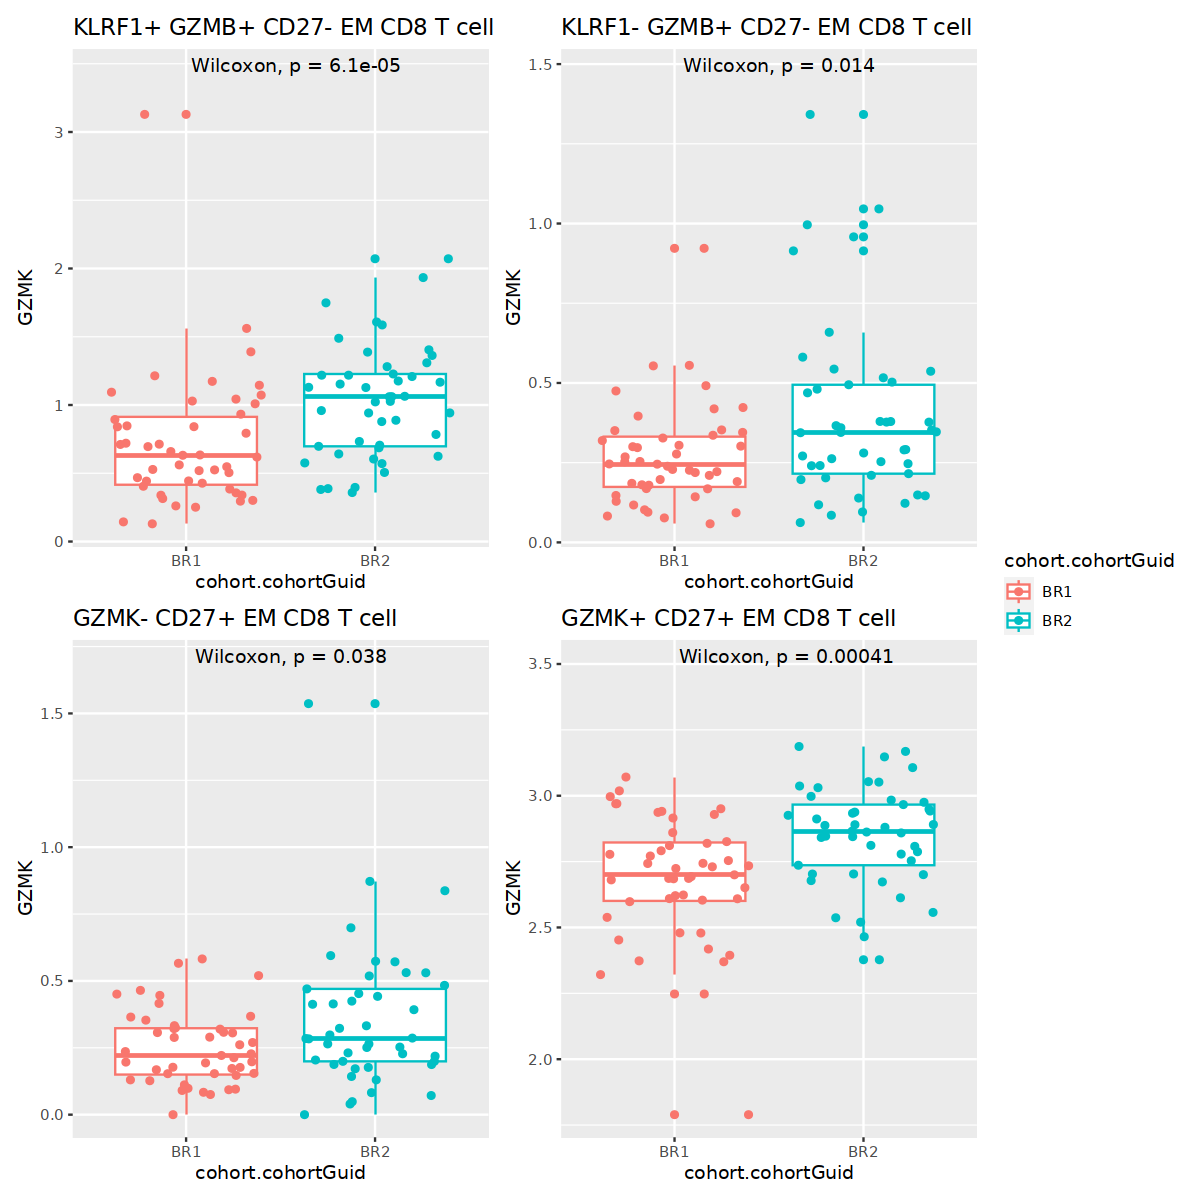

In [142]:
options(repr.plot.width = 10, repr.plot.height = 10)


wrap_plots(p_list)+ plot_layout(guides = "collect")

In [153]:
gene <- "GATA3"
p_list<-list()
for (i in cd8_effetor_mem){
df_exp <- extract_expression(gene, i, df_list, meta_data)
max_value=max(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0') %>% select(Mean_Expression))

p_list[[i]]<-ggplot(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0'), 
       aes(x=cohort.cohortGuid,y=Mean_Expression)) + 
geom_boxplot(aes(col=cohort.cohortGuid))+geom_jitter(aes(col=cohort.cohortGuid))+ylab(gene)+ggtitle(i)+ # Add pairwise comparisons p-value
  stat_compare_means(label.y = 1.1*max_value,label.x=1.25) 

}

Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


[1] "PB00295-02  does not contain this cell type"
[1] "PB00577-02  does not contain this cell type"


Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


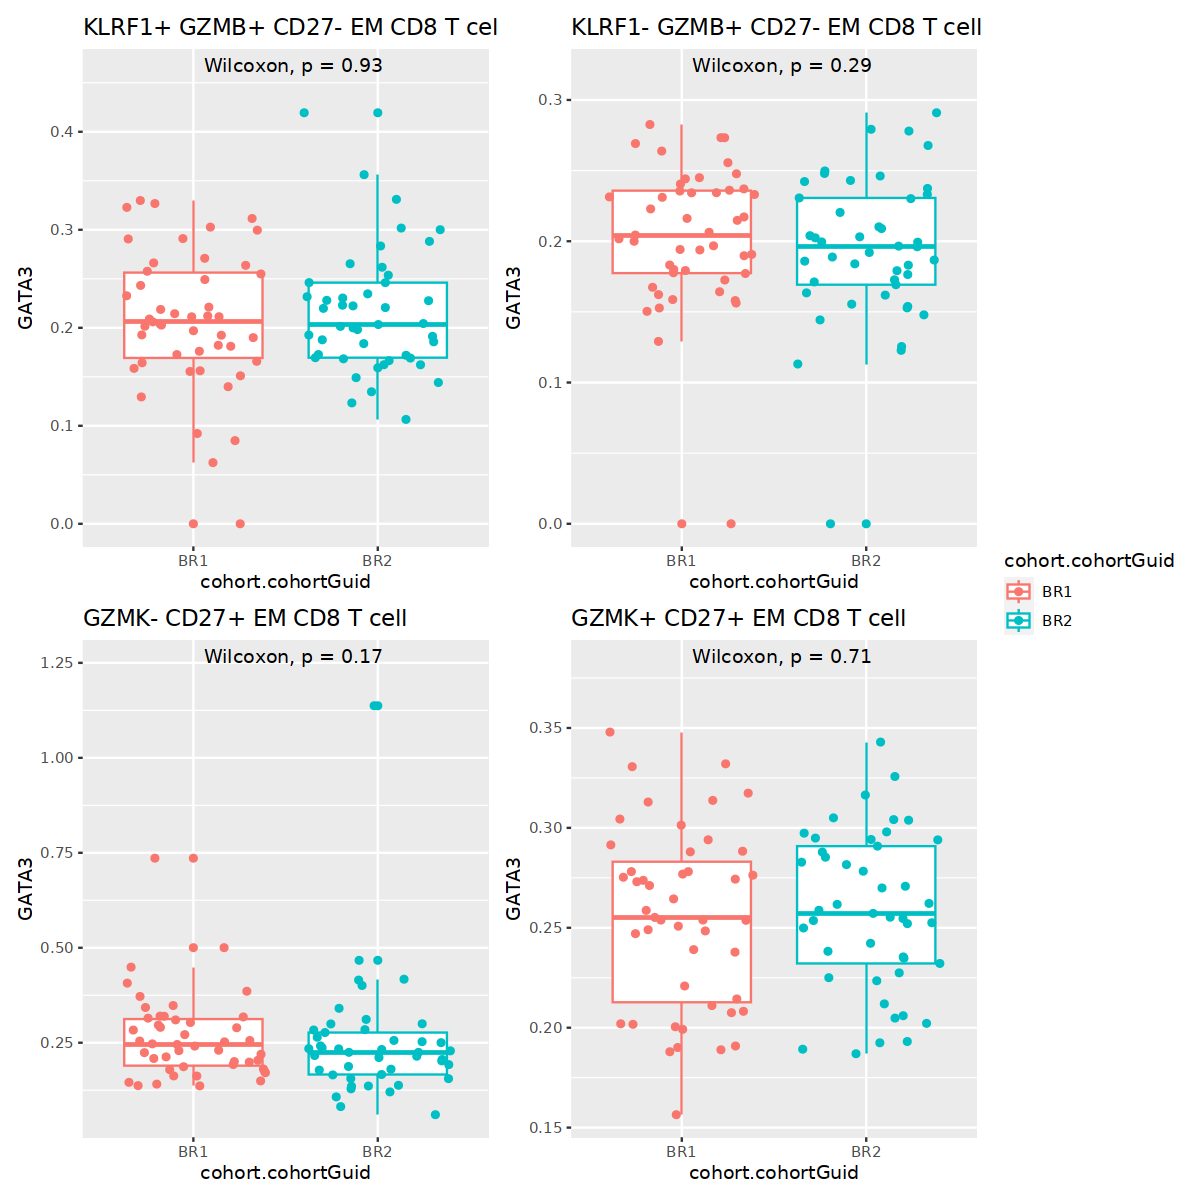

In [154]:
options(repr.plot.width = 10, repr.plot.height = 10)


wrap_plots(p_list)+ plot_layout(guides = "collect")

In [101]:
gene <- "GZMK"
p_list<-list()
for (i in cd8_effetor_mem){
df_exp <- extract_expression(gene, i, df_list, meta_data)
p_list[[i]]<-ggplot(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0'), 
       aes(x=Age,y=Mean_Expression,color=cohort.cohortGuid)) + 
  geom_point()+
  geom_smooth(method=lm)+ylab(gene)+ggtitle(i)

}

Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


[1] "PB00295-02  does not contain this cell type"
[1] "PB00577-02  does not contain this cell type"


Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


# Naive CD4 and CM CD4

In [103]:
naive_cm_cd4<-c('Core naive CD4 T cell','CM CD4 T cell')

In [143]:
gene <- "TSHZ2"
p_list<-list()
p_list<-list()
for (i in naive_cm_cd4){
df_exp <- extract_expression(gene, i, df_list, meta_data)
max_value=max(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0') %>% select(Mean_Expression))

p_list[[i]]<-ggplot(df_exp %>% filter(sample.visitName=='Flu Year 1 Day 0'), 
       aes(x=cohort.cohortGuid,y=Mean_Expression)) + 
geom_boxplot(aes(col=cohort.cohortGuid))+geom_jitter(aes(col=cohort.cohortGuid))+ylab(gene)+ggtitle(i)+ # Add pairwise comparisons p-value
  stat_compare_means(label.y = 1.1*max_value,label.x=1.25) 

}

Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


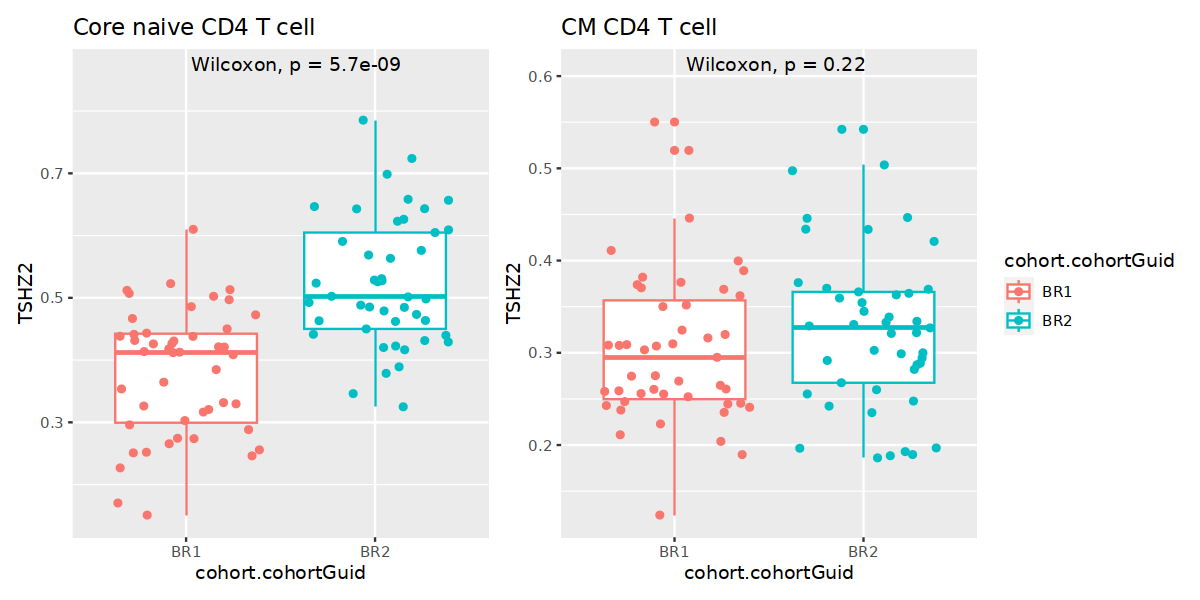

In [144]:
options(repr.plot.width = 10, repr.plot.height = 5)
wrap_plots(p_list)+ plot_layout(guides = "collect")

In [8]:
naive_cd4_cd8<-c('Core naive CD4 T cell','Core naive CD8 T cell',
                 'SOX4+ naive CD4 T cell','SOX4+ naive CD8 T cell','CM CD4 T cell')

In [15]:
find_outliers <- function(x) {
  q25 <- quantile(x, 0.25)
  q75 <- quantile(x, 0.75)
  iqr <- q75 - q25
  return(x < (q25 - 2 * iqr) | x > (q75 + 2 * iqr))
}

In [24]:
gene <- "TSHZ2"
p_list<-list()
p_list<-list()
for (i in naive_cd4_cd8){
df_exp <- extract_expression(gene, i, df_list, meta_data)
    
df_exp_filtered <- df_exp %>%
  filter(sample.visitName == 'Flu Year 1 Day 0') %>%
  mutate(outlier = find_outliers(Mean_Expression)) %>%
  filter(!outlier)    



max_value=max(df_exp_filtered  %>% select(Mean_Expression))

p_list[[i]]<-ggplot(df_exp_filtered, 
       aes(x=cohort.cohortGuid,y=Mean_Expression)) + 
geom_boxplot(aes(col=cohort.cohortGuid), outlier.shape = NA)+geom_jitter(aes(col=cohort.cohortGuid)
                                                                         
                                                                         , height = 0)+ylab(gene)+ggtitle(i)+ # Add pairwise comparisons p-value
  stat_compare_means(label.y = 1.1*max_value,label.x=1.25) 

}

Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


[1] "PB00564-04  does not contain this cell type"
[1] "PB00568-01  does not contain this cell type"
[1] "PB00602-01  does not contain this cell type"
[1] "PB00292-02  does not contain this cell type"
[1] "PB00293-02  does not contain this cell type"
[1] "PB00294-02  does not contain this cell type"
[1] "PB00512-01  does not contain this cell type"
[1] "PB01424-01  does not contain this cell type"
[1] "PB01437-01  does not contain this cell type"
[1] "PB01521-01  does not contain this cell type"
[1] "PB01530-01  does not contain this cell type"
[1] "PB01537-01  does not contain this cell type"
[1] "PB01599-01  does not contain this cell type"
[1] "PB01979-01  does not contain this cell type"
[1] "PB01997-01  does not contain this cell type"
[1] "PB01998-04  does not contain this cell type"
[1] "PB02235-04  does not contain this cell type"
[1] "PB02327-002  does not contain this cell type"
[1] "PB02339-001  does not contain this cell type"
[1] "PB02342-001  does not contain this cell typ

Joining with `by = join_by(pbmc_sample_id)`


[1] "PB00015-01  does not contain this cell type"
[1] "PB00339-01  does not contain this cell type"
[1] "PB00352-04  does not contain this cell type"
[1] "PB00356-01  does not contain this cell type"
[1] "PB00369-01  does not contain this cell type"
[1] "PB00377-01  does not contain this cell type"
[1] "PB00388-01  does not contain this cell type"
[1] "PB00539-01  does not contain this cell type"
[1] "PB00564-04  does not contain this cell type"
[1] "PB00568-01  does not contain this cell type"
[1] "PB00599-01  does not contain this cell type"
[1] "PB00602-01  does not contain this cell type"
[1] "PB00020-01  does not contain this cell type"
[1] "PB00151-01  does not contain this cell type"
[1] "PB00254-01  does not contain this cell type"
[1] "PB00260-01  does not contain this cell type"
[1] "PB00264-01  does not contain this cell type"
[1] "PB00275-03  does not contain this cell type"
[1] "PB00288-01  does not contain this cell type"
[1] "PB00289-01  does not contain this cell type"


Joining with `by = join_by(pbmc_sample_id)`
Joining with `by = join_by(pbmc_sample_id)`


Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `data.frame()`:
! arguments imply differing number of rows: 0, 1”


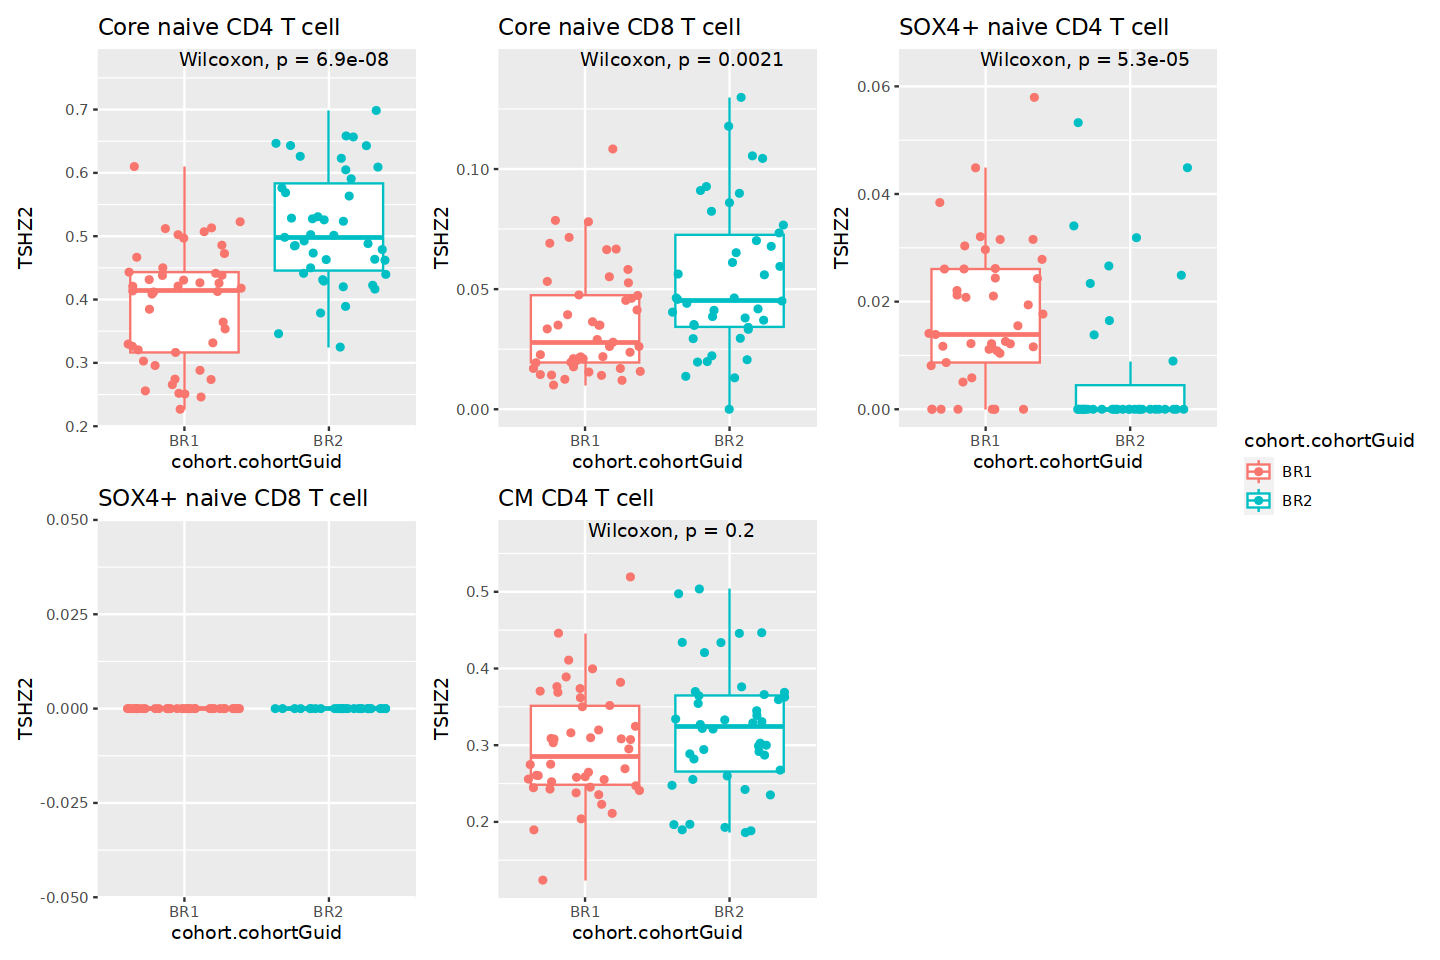

In [25]:
options(repr.plot.width = 12, repr.plot.height = 8)
wrap_plots(p_list)+ plot_layout(guides = "collect")